In [1]:
#先導入資料處理會用到的模組
import numpy as np
import numpy.random as random
import scipy as sp
from pandas import Series, DataFrame
import pandas as pd

# 可視化模組
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

# 機器學習模組
import sklearn

#設定seaborn為預設繪圖library
sns.set()

In [2]:
#讀檔
dataset = pd.read_csv('train.csv')
dataset.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


0    187437
1     58288
Name: Is_Lead, dtype: int64


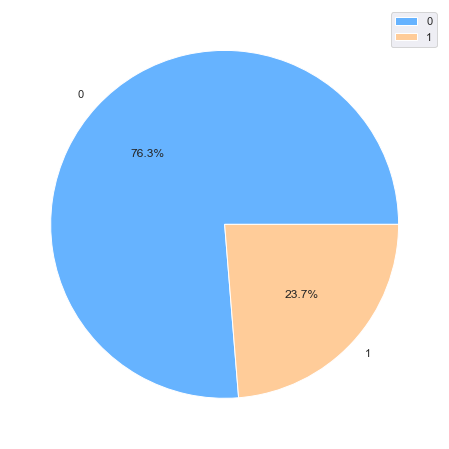

In [3]:
plt.figure(figsize = (12,8))
print(dataset['Is_Lead'].value_counts())
colors = ['#66b3ff','#ffcc99']
plt.pie(dataset['Is_Lead'].value_counts(), labels = ['0','1'], autopct='%.1f%%',colors= colors)
plt.legend()
plt.show()

## 1. Credit_Product去掉空值

In [4]:
dataset = dataset.dropna(axis=0, how='any')

In [5]:
dataset.isna().sum()

ID                     0
Gender                 0
Age                    0
Region_Code            0
Occupation             0
Channel_Code           0
Vintage                0
Credit_Product         0
Avg_Account_Balance    0
Is_Active              0
Is_Lead                0
dtype: int64

In [6]:
#取log使其較符合常態分佈

dataset['Avg_Account_Balance'] = np.log(dataset['Avg_Account_Balance'])


# 設定預測目標變數與解釋變數

In [7]:
#設定預測目標變數與解釋變數
dataset_data = dataset.drop('Is_Lead', axis = 1)
dataset_target = dataset['Is_Lead']

#Survived為series，加入[]轉成dataframe
dataset_target2 = dataset[['Is_Lead']]

dataset_data.shape, dataset_target2.shape

((216400, 10), (216400, 1))

In [8]:
#去除ID和Region_Code
features_drop = ['ID', 'Region_Code', 'Gender', 'Channel_Code']
dataset_data = dataset_data.drop(features_drop, axis = 1)

In [9]:
dataset_data.head()

,Age,Occupation,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,73,Other,43,No,13.860193,No
1,30,Salaried,32,No,13.274205,No
2,56,Self_Employed,26,No,14.210464,Yes
3,34,Salaried,19,No,13.061453,No
4,30,Salaried,33,No,13.695360,No


In [10]:
# 取數值＆類別的欄位
data_num_cols = dataset_data._get_numeric_data().columns 
data_cat_cols = dataset_data.columns.difference(data_num_cols)

print("Numeric columns: ", data_num_cols)
print()
print("Categorical columns: ", data_cat_cols)

Numeric columns:  Index(['Age', 'Vintage', 'Avg_Account_Balance'], dtype='object')

Categorical columns:  Index(['Credit_Product', 'Is_Active', 'Occupation'], dtype='object')


In [11]:
#區分數值＆類別資料

data_num_data = dataset_data.loc[:, data_num_cols]
data_cat_data = dataset_data.loc[:, data_cat_cols]

print("Shape of num data:", data_num_data.shape)
print("Shape of cat data:", data_cat_data.shape)

Shape of num data: (216400, 3)
Shape of cat data: (216400, 3)


In [34]:
data_num_data.describe()

,Age,Vintage,Avg_Account_Balance
count,216400.000000,216400.000000,216400.000000
mean,42.807315,44.285522,13.720060
std,14.850996,31.235351,0.620936
min,23.000000,7.000000,9.942227
25%,29.000000,20.000000,13.297734
50%,41.000000,31.000000,13.688289
75%,53.000000,67.000000,14.113051
max,85.000000,135.000000,16.152691


In [12]:
#利用StandardScaler標準化

from sklearn import preprocessing
s_scaler = preprocessing.StandardScaler()

data_num_data_s = s_scaler.fit_transform(data_num_data)

data_num_data_s = pd.DataFrame(data_num_data_s, columns = data_num_cols)

# fig, (ax1) = plt.subplots(ncols=1, figsize=(8, 5))
# ax1.set_title('After StandardScaler')

# sns.kdeplot(data_num_data_s['Age'], ax=ax1)
# sns.kdeplot(data_num_data_s['Vintage'], ax=ax1)
# sns.kdeplot(data_num_data_s['Avg_Account_Balance'], ax=ax1);

In [35]:
data_num_data_s['Age']

0         2.033046
1        -0.862390
2         0.888339
3        -0.593047
4        -0.862390
            ...   
216395   -0.323704
216396   -1.064397
216397   -1.131732
216398   -0.997061
216399   -0.929725
Name: Age, Length: 216400, dtype: float64

In [13]:
data_num_data_s.head()

,Age,Vintage,Avg_Account_Balance
0,2.033046,-0.041156,0.225681
1,-0.862390,-0.393322,-0.718039
2,0.888339,-0.585412,0.789784
3,-0.593047,-0.809518,-1.060670
4,-0.862390,-0.361307,-0.039779


## 類別轉數值

In [14]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
data_cat_data = data_cat_data.apply(LabelEncoder().fit_transform)

In [15]:
data_num_data_s.reset_index(drop=True, inplace=True)
data_cat_data.reset_index(drop=True, inplace=True)
#df = pd.concat([df1, df2], axis=1)

data_new = pd.concat([data_num_data_s, data_cat_data], axis = 1)

In [16]:
data_new.head()

,Age,Vintage,Avg_Account_Balance,Credit_Product,Is_Active,Occupation
0,2.033046,-0.041156,0.225681,0,0,1
1,-0.862390,-0.393322,-0.718039,0,0,2
2,0.888339,-0.585412,0.789784,0,1,3
3,-0.593047,-0.809518,-1.060670,0,0,2
4,-0.862390,-0.361307,-0.039779,0,0,2


## 用SMOTE拆分

In [17]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(data_new, dataset_target2)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)



In [38]:
X_test.head(50)

,Age,Vintage,Avg_Account_Balance,Credit_Product,Is_Active,Occupation
356172,1.208621,1.319069,1.086917,1,1,3
192701,-0.862390,-0.745488,0.443094,0,1,2
149276,0.012975,-0.745488,-1.062349,0,1,3
60564,1.696367,1.143402,-1.271079,1,0,1
208894,0.888339,0.791236,-1.179670,0,1,3
106202,2.167717,-0.809518,1.147086,1,0,1
216655,0.551660,1.353466,0.491695,1,0,3
227717,0.154990,1.111387,-0.049032,1,0,3
75626,0.551660,-0.809518,-0.794704,1,1,3
297013,0.549194,2.290082,0.668780,1,1,0


In [37]:
y_test.head()

,Is_Lead
356172,1
192701,0
149276,0
60564,0
208894,1


## XGBoost (最後選擇的模型)

In [19]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, roc_auc_score, plot_roc_curve, auc
from sklearn.metrics import make_scorer


In [20]:
model = XGBClassifier(n_estimators = 300)
model.fit(X_train, y_train)

predicted = model.predict(X_test)

accuracy = accuracy_score(y_test, predicted)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

/Users/kainie56560005/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/kainie56560005/opt/anaconda3/envs/py38/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[15:28:23] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 89.62%


In [21]:
import pickle

In [22]:
# save model to file
pickle.dump(model, open("pima.pickle.dat", "wb"))

# 其他模型比較

### Decision Tree

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer
from sklearn.metrics import confusion_matrix

In [24]:
dt_model = tree.DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [25]:
dt_predicted = dt_model.predict(X_test)

dt_accuracy = accuracy_score(y_test, dt_predicted)
print("Accuracy: %.2f%%" % (dt_accuracy * 100.0))



Accuracy: 86.35%


### Random Forest

In [26]:
from sklearn import ensemble

In [27]:
rf_model = ensemble.RandomForestClassifier(n_estimators=1000)
rf_model.fit(X_train, y_train)

<ipython-input-27-add39c0fda75>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train, y_train)


KeyboardInterrupt: 

In [ ]:
rf_predicted = rf_model.predict(X_test)

rf_accuracy = accuracy_score(y_test, rf_predicted)
print("Accuracy: %.2f%%" % (dt_accuracy * 100.0))